In [2]:
import pickle
import os

In [22]:
files = os.listdir(".")

In [23]:
history = [x for x in files if ".pickle" in x and x.count("_")==2 and not 'dataset' in x]

In [24]:
import pandas as pd

df = pd.DataFrame(history, columns = ['filename'])

In [26]:
# df['experiment'] = df['filename'].apply(lambda x:int(x[4]))
df['experiment'] = df['filename'].apply(lambda x:int(x[2]))

In [27]:
df['step'] = df['filename'].apply(lambda x:int(x[0]))

In [29]:
import matplotlib.pyplot as plt

In [30]:
df = df.sort_values(by=['experiment','step'])

In [34]:
def load_file(fn):
    with open('{}'.format(fn),'rb') as f:
        return pickle.load(f)

In [36]:
df['data'] = df['filename'].apply(load_file)

In [37]:
df['loss_hist'] = df['data'].apply(lambda x: x['loss_hist'])
df['loss_val'] = df['data'].apply(lambda x: x['val_loss'])
df['grad'] = df['data'].apply(lambda x: x['grad'])

In [38]:
from itertools import chain

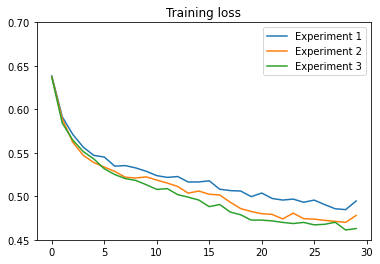

In [40]:
%matplotlib inline

fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
ax.set_title('Training loss')
ax.set_ylim([0.45, 0.7])

for i in set(df['experiment'].values):
    temp_df = df[(df['experiment']==i)]
    loss_hist = list(chain(*temp_df['loss_hist'].values))
    ax.plot(loss_hist, label = "Experiment {}".format(i+1))    

plt.legend()
plt.savefig('training_loss.png')
plt.show()

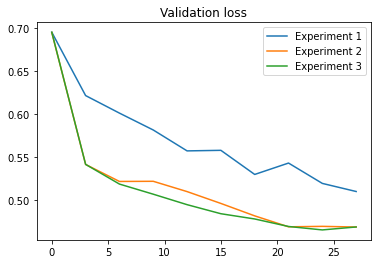

In [41]:
batch_size_test = 4
val_epoch = 2562
fig = plt.figure(figsize=(6, 4))

ax2 = plt.gca()

for i in set(df['experiment'].values):
    temp_df = df[(df['experiment']==i)].iloc[-1]
    loss_hist_y = temp_df['loss_val']
    loss_hist_y = [x/val_epoch for x in loss_hist_y]
    loss_hist_x = list(range(0,3*len(loss_hist_y),3))
    ax2.plot(loss_hist_x, loss_hist_y , label = "Experiment {}".format(i+1))
plt.legend()
ax2.set_title('Validation loss')
plt.savefig('validation_loss.png')

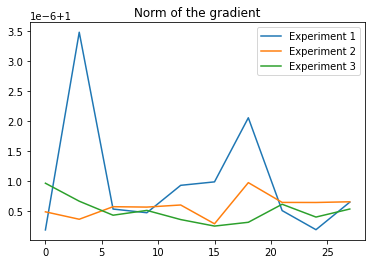

In [43]:
%matplotlib inline

fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
ax.set_title('Norm of the gradient')

for i in set(df['experiment'].values):
    temp_df = df[(df['experiment']==i)]
    grad_hist_y = list(temp_df['grad'].values)
    grad_hist_x = list(range(0,3*len(loss_hist_y),3))
    ax.plot(grad_hist_x,grad_hist_y , label = "Experiment {}".format(i+1))    

plt.legend()
plt.savefig('grad_norm.png')
plt.show()

In [ ]:
df['grad'].values